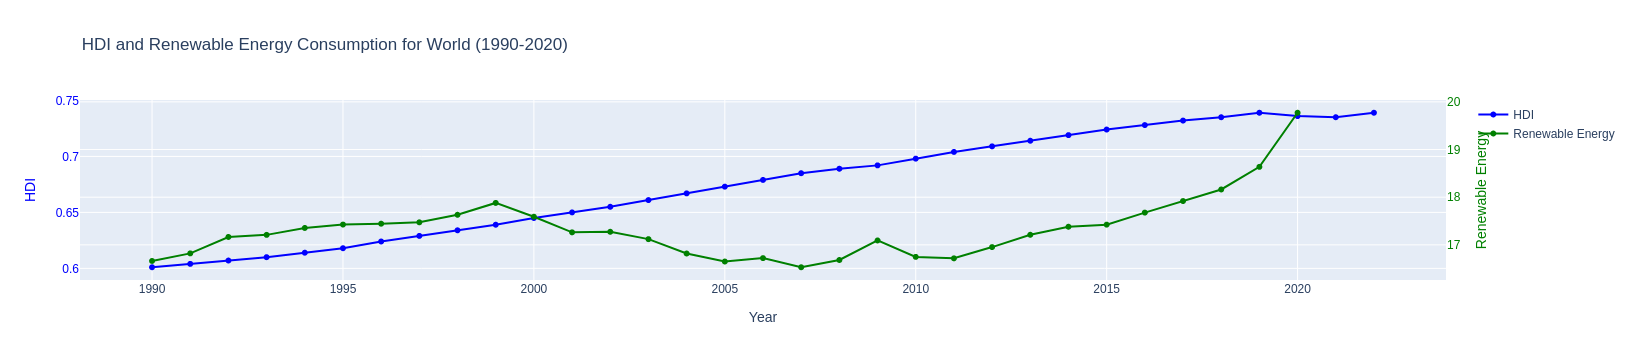

In [6]:
import pandas as pd
import plotly.graph_objs as go

# Sample data creation steps (for illustration)
df_renewable = pd.read_csv('renewable_en.csv')
df_hdi = pd.read_csv('hdi_py_cleaned.csv')

# Extract data for "World" from both DataFrames
df_world_renewable = df_renewable[df_renewable['Country Name'] == 'World']
df_world_hdi = df_hdi[df_hdi['country'] == 'World']

# Rename columns for easier merging
df_world_renewable = df_world_renewable.rename(columns=lambda x: x.split(' ')[0] if '[YR' in x else x)
df_world_hdi = df_world_hdi.rename(columns=lambda x: x.split('_')[1] if 'hdi_' in x else x)

# Keep only year columns and relevant identifiers
renewable_year_columns = [col for col in df_world_renewable.columns if col.isdigit()]
hdi_year_columns = [col for col in df_world_hdi.columns if col.isdigit()]

# Convert both DataFrames to long format for merging
df_world_renewable_long = df_world_renewable.melt(id_vars=['Country Name', 'Series Name'], value_vars=renewable_year_columns, var_name='Year', value_name='Renewable Energy')
df_world_hdi_long = df_world_hdi.melt(id_vars=['country'], value_vars=hdi_year_columns, var_name='Year', value_name='HDI')

# Merge the two DataFrames on 'Year'
df_merged = pd.merge(df_world_renewable_long, df_world_hdi_long, on='Year')

# Filter out unnecessary columns and drop NaN values
df_plot = df_merged[['Year', 'HDI', 'Renewable Energy']].dropna()

# Ensure the data types are correct
df_plot['Year'] = df_plot['Year'].astype(int)
df_plot['HDI'] = pd.to_numeric(df_plot['HDI'], errors='coerce')
df_plot['Renewable Energy'] = pd.to_numeric(df_plot['Renewable Energy'], errors='coerce')

# Keep only the highest HDI score for each year
df_plot = df_plot.loc[df_plot.groupby('Year')['HDI'].idxmax()]

# # Print data types and sample data for debugging
# print(df_plot.dtypes)
# print(df_plot.head())

# Plotting with Plotly
fig = go.Figure()

# Add HDI trace
fig.add_trace(
    go.Scatter(x=df_plot['Year'], y=df_plot['HDI'], mode='markers+lines', name='HDI', line=dict(color='blue'))
)

# Add Renewable Energy trace on secondary y-axis
fig.add_trace(
    go.Scatter(x=df_plot['Year'], y=df_plot['Renewable Energy'], mode='markers+lines', name='Renewable Energy', line=dict(color='green'), yaxis='y2')
)

# Update layout with titles and labels
fig.update_layout(
    title='HDI and Renewable Energy Consumption for World (1990-2020)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='HDI', titlefont=dict(color='blue'), tickfont=dict(color='blue')),
    yaxis2=dict(title='Renewable Energy', titlefont=dict(color='green'), tickfont=dict(color='green'), overlaying='y', side='right')
)

# Show plot
fig.show()


In [7]:
#df_plot

In [8]:
df_plot['Year'] = df_plot['Year'].astype(int)
df_plot['HDI'] = pd.to_numeric(df_plot['HDI'], errors='coerce')
df_plot['Renewable Energy'] = pd.to_numeric(df_plot['Renewable Energy'], errors='coerce')

# Print data types and sample data for debugging
print(df_plot.dtypes)
print(df_plot.head())

# Plot the data
plt.figure(figsize=(12, 6))

# Plot HDI values
plt.plot(df_plot['Year'].values, df_plot['HDI'].values, label='HDI', color='blue', marker='o')

# Plot renewable energy values
plt.plot(df_plot['Year'].values, df_plot['Renewable Energy'].values, label='Renewable Energy', color='green', marker='x')

# Add titles and labels
plt.title('HDI and Renewable Energy Consumption for World (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Value')
fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

Year                  int64
HDI                 float64
Renewable Energy    float64
dtype: object
   Year    HDI  Renewable Energy
0  1990  0.601         16.662330
2  1991  0.604         16.821274
4  1992  0.607         17.165780
6  1993  0.610         17.209889
8  1994  0.614         17.354901


NameError: name 'plt' is not defined

In [ ]:

# Merge the two DataFrames on 'Year'
df_merged = pd.merge(df_world_renewable_long, df_world_hdi_long, on='Year')

# Filter out unnecessary columns and drop NaN values
df_plot = df_merged[['Year', 'HDI', 'Renewable Energy']].dropna()

# Ensure the data types are correct
df_plot['Year'] = df_plot['Year'].astype(int)
df_plot['HDI'] = pd.to_numeric(df_plot['HDI'], errors='coerce')
df_plot['Renewable Energy'] = pd.to_numeric(df_plot['Renewable Energy'], errors='coerce')

# Convert columns to numpy arrays to avoid multi-dimensional indexing issues
years = df_plot['Year'].to_numpy()
hdi_values = df_plot['HDI'].to_numpy()
renewable_energy_values = df_plot['Renewable Energy'].to_numpy()

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot HDI values on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('HDI', color=color)
ax1.plot(years, hdi_values, label='HDI', color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary y-axis for renewable energy values
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Renewable Energy (% of Total)', color=color)
ax2.plot(years, renewable_energy_values, label='Renewable Energy', color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and labels
plt.title('HDI and Renewable Energy Consumption for World (1990-2020)')

# Show plot
fig.tight_layout()
plt.show()


In [14]:
df_plot.dropna()

,Year,HDI,Renewable Energy
0,1990,0.601,16.662330
1,1990,0.566,16.662330
2,1991,0.604,16.821274
3,1991,0.570,16.821274
4,1992,0.607,17.165780
...,...,...,...
68,2019,0.574,18.636542
69,2019,0.686,18.636542
70,2020,0.736,19.771344
71,2020,0.572,19.771344


In [15]:
# Ensure the data types are correct
df_plot['Year'] = df_plot['Year'].astype(int)
df_plot['HDI'] = pd.to_numeric(df_plot['HDI'], errors='coerce')
df_plot['Renewable Energy'] = pd.to_numeric(df_plot['Renewable Energy'], errors='coerce')

# Print data types and sample data for debugging
print(df_plot.dtypes)
print(df_plot.head())



Year                  int64
HDI                 float64
Renewable Energy    float64
dtype: object
   Year    HDI  Renewable Energy
0  1990  0.601         16.662330
1  1990  0.566         16.662330
2  1991  0.604         16.821274
3  1991  0.570         16.821274
4  1992  0.607         17.165780


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

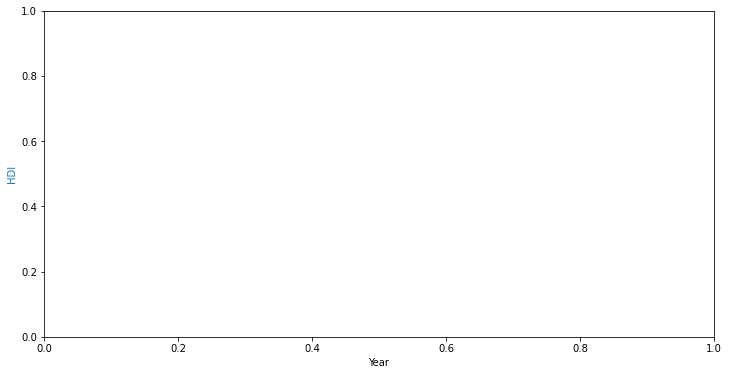

In [16]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot HDI values on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('HDI', color=color)
ax1.plot(df_plot['Year'], df_plot['HDI'], label='HDI', color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary y-axis for renewable energy values
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Renewable Energy (% of Total)', color=color)
ax2.plot(df_plot['Year'], df_plot['Renewable Energy'], label='Renewable Energy', color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and labels
plt.title('HDI and Renewable Energy Consumption for World (1990-2020)')

# Show plot
fig.tight_layout()
plt.show()

